In [4]:
import pandas_datareader as pdr

In [5]:
key = '2b3a67141d7de598aa4698a368faaf2ef16400b5'
df = pdr.get_data_tiingo("AAPL", api_key=key)

In [6]:
df.to_csv('datas/AAPL.csv')

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('datas/AAPL.csv')

In [68]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-08-25 00:00:00+00:00,103.74,111.11,103.50,111.110,103601599,95.853775,102.663514,95.632019,102.663514,103601599,0.0,1.0
1,AAPL,2015-08-26 00:00:00+00:00,109.69,109.89,105.05,107.085,96774611,101.351461,101.536257,97.064189,98.944491,96774611,0.0,1.0
2,AAPL,2015-08-27 00:00:00+00:00,112.92,113.24,110.02,112.250,84616056,104.335919,104.631593,101.656374,103.716852,84616056,0.0,1.0
3,AAPL,2015-08-28 00:00:00+00:00,113.29,113.31,111.54,112.170,53164407,104.677792,104.696271,103.060825,103.642933,53164407,0.0,1.0
4,AAPL,2015-08-31 00:00:00+00:00,112.76,114.53,112.00,112.130,56229271,104.188082,105.823528,103.485856,103.605974,56229271,0.0,1.0


In [38]:
df1 = df.reset_index()['close']

In [39]:
df1

0       103.74
1       109.69
2       112.92
3       113.29
4       112.76
         ...  
1253    458.43
1254    462.25
1255    462.83
1256    473.10
1257    497.48
Name: close, Length: 1258, dtype: float64

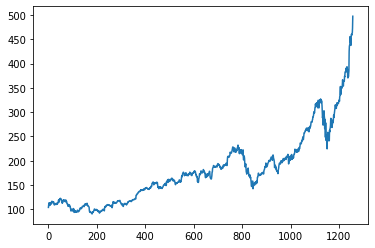

In [40]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [41]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
df1=scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [42]:
df1.shape

(1258, 1)

In [43]:
 df1

array([[0.03291251],
       [0.04752665],
       [0.05546004],
       ...,
       [0.91489414],
       [0.94011888],
       [1.        ]])

In [48]:
### splitting dataset into train and test
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size],df1[training_size:len(df1)]

In [58]:
import numpy as np

def create_dataset(data_set, time_step=1):
    data_x, data_y = [], []
    for i in range(len(data_set)-time_step-1):
        data_x.append(data_set[i:(i+time_step)])
        data_y.append(data_set[i+time_step])
    return np.array(data_x), np.array(data_y)

In [59]:
time_step = 100
train_x, train_y = create_dataset(train_data, time_step)
test_x, test_y = create_dataset(test_data, time_step)

In [66]:
print(train_x.shape)
print(train_y.shape)

(716, 100, 1)
(716, 1)


In [67]:
print(test_x.shape)
print(test_y.shape)

(340, 100, 1)
(340, 1)


In [69]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [92]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [70]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.fit(train_x, train_y,
          validation_data=(test_x, test_y),
          epochs=100,
          batch_size=64,
          verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 208ms/step - loss: 0.0113 - val_loss: 0.0412
Epoch 2/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 3/100
12/12 [==============================] - 2s 128ms/step - loss: 5.3981e-04 - val_loss: 0.0028
Epoch 4/100
12/12 [==============================] - 2s 127ms/step - loss: 3.3843e-04 - val_loss: 0.0039
Epoch 5/100
12/12 [==============================] - 2s 133ms/step - loss: 2.8994e-04 - val_loss: 0.0030
Epoch 6/100
12/12 [==============================] - 2s 127ms/step - loss: 2.7274e-04 - val_loss: 0.0030
Epoch 7/100
12/12 [==============================] - 1s 124ms/step - loss: 2.6950e-04 - val_loss: 0.0033
Epoch 8/100
12/12 [==============================] - 2s 130ms/step - loss: 2.8430e-04 - val_loss: 0.0035
Epoch 9/100
12/12 [==============================] - 2s 132ms/step - loss: 2.7133e-04 - val_loss: 0.0046
Epoch 10/100
12/12 [==============================] - 1s 123ms/

12/12 [==============================] - 2s 131ms/step - loss: 1.1300e-04 - val_loss: 0.0014
Epoch 79/100
12/12 [==============================] - 2s 133ms/step - loss: 1.0346e-04 - val_loss: 7.5842e-04
Epoch 80/100
12/12 [==============================] - 2s 139ms/step - loss: 1.1142e-04 - val_loss: 0.0015
Epoch 81/100
12/12 [==============================] - 2s 132ms/step - loss: 1.0075e-04 - val_loss: 0.0015
Epoch 82/100
12/12 [==============================] - 2s 181ms/step - loss: 1.1770e-04 - val_loss: 0.0015
Epoch 83/100
12/12 [==============================] - 2s 157ms/step - loss: 1.2048e-04 - val_loss: 0.0011
Epoch 84/100
12/12 [==============================] - 2s 127ms/step - loss: 1.0018e-04 - val_loss: 9.2850e-04
Epoch 85/100
12/12 [==============================] - 2s 142ms/step - loss: 9.8715e-05 - val_loss: 9.1282e-04
Epoch 86/100
12/12 [==============================] - 2s 140ms/step - loss: 1.0262e-04 - val_loss: 0.0021
Epoch 87/100
12/12 [===========================

In [81]:
train_predict=model.predict(train_x)
test_predict=model.predict(test_x)

In [82]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [83]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_y, train_predict))

152.94004974769743

In [84]:
math.sqrt(mean_squared_error(test_y, test_predict))

273.38001460244135

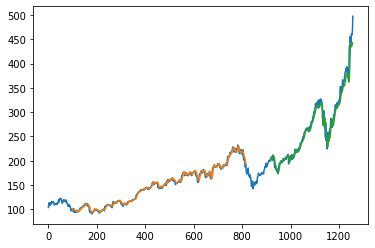

In [89]:
### Plotting
# shift train predictions for plotting
look_back=100
train_predict_plot=np.empty_like(df1)
train_predict_plot[:,:]=np.nan
train_predict_plot[look_back:len(train_predict)+look_back,:]=train_predict

# shift test predictions for plotting
test_predict_plot=np.empty_like(df1)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [90]:
print(test_predict)

[[200.77602]
 [200.77379]
 [201.27596]
 [202.18803]
 [203.58905]
 [205.15758]
 [206.35158]
 [206.8745 ]
 [206.82086]
 [205.94374]
 [205.66797]
 [206.09503]
 [207.29239]
 [208.51575]
 [208.73436]
 [207.93573]
 [206.27281]
 [203.84422]
 [199.87874]
 [195.4288 ]
 [191.7095 ]
 [189.17644]
 [187.76613]
 [186.63113]
 [185.96544]
 [185.36284]
 [184.43669]
 [183.21637]
 [181.86981]
 [180.55342]
 [179.5521 ]
 [178.6279 ]
 [177.60173]
 [177.22548]
 [177.8848 ]
 [179.61156]
 [182.44662]
 [186.04422]
 [189.93633]
 [193.40538]
 [195.96756]
 [197.29663]
 [197.62941]
 [197.79156]
 [197.9807 ]
 [198.38272]
 [198.84474]
 [199.21173]
 [199.07321]
 [198.94946]
 [198.99622]
 [198.99692]
 [199.31197]
 [200.0528 ]
 [201.23563]
 [202.57971]
 [203.3182 ]
 [203.46555]
 [203.4203 ]
 [203.1958 ]
 [203.05257]
 [203.27397]
 [203.7216 ]
 [204.09857]
 [204.56142]
 [204.72209]
 [205.07957]
 [205.86888]
 [206.91914]
 [207.78458]
 [208.3725 ]
 [208.89954]
 [209.2809 ]
 [209.99216]
 [210.4396 ]
 [209.95357]
 [207.42563]

In [93]:
len(test_data)

441

In [94]:
input_x=test_data[341:].reshape(1, -1)
input_x.shape

(1, 100)

In [98]:
input_t=list(input_x)
input_t=input_t[0].tolist()

In [101]:
# demonstrate prediction for next 10 days

from numpy import array

first_output=[]
n_steps=100
i=0

ptest_x=input_x 

while(i<30):
    if (len(input_t)>100):
        ptest_x=np.array(input_t[1:])
        print("{} day input {}".format(i, ptest_x))
        ptest_x=ptest_x.reshape(1,-1)
        ptest_x=ptest_x.reshape((1, n_steps, 1))
        
        ptest_y=model.predict(ptest_x, verbose=0)
        print("{} day output {}".format(i, ptest_y))
        input_t.extend(ptest_y[0].tolist())
        input_t=input_t[1:]
        first_output.extend(ptest_y.tolist())
        i=i+1
    else:
        ptest_x=ptest_x.reshape((1, n_steps,1))
        ptest_y=model.predict(ptest_x, verbose=0)
        print(ptest_y[0])
        input_t.extend(ptest_y[0].tolist())
        print(len(input_t))
        first_output.extend(ptest_y.tolist())
        i=i+1
        
    print(first_output)
    
        

[0.8927777]
101
[[0.892777681350708]]
1 day input [0.3796974  0.37105173 0.42277841 0.41531169 0.43162057 0.4363364
 0.44925578 0.48315076 0.47671563 0.48226654 0.47271209 0.45829444
 0.43726974 0.45625583 0.45362774 0.47312964 0.47362087 0.4623471
 0.48482095 0.49972982 0.4881122  0.49815788 0.50896498 0.51650538
 0.52414403 0.53983888 0.55182493 0.54298276 0.53374761 0.53838974
 0.53389497 0.55170212 0.54723191 0.56218991 0.55634426 0.56135482
 0.55604952 0.55943901 0.55978288 0.55902147 0.56862504 0.57228472
 0.57665668 0.56977944 0.59232696 0.59714103 0.62300437 0.64474137
 0.60313406 0.61025691 0.62054821 0.64287469 0.64167117 0.64201503
 0.63707815 0.659552   0.67836616 0.66247482 0.67421526 0.64668173
 0.66669942 0.67411701 0.67242226 0.67242226 0.69634524 0.69349609
 0.71481554 0.71884364 0.72048927 0.71614187 0.73166478 0.73822272
 0.72640861 0.7244928  0.7444368  0.73109987 0.73377708 0.69027853
 0.68801886 0.70958393 0.69428207 0.71184359 0.72314192 0.82207594
 0.84838139 0.

 0.83608341 0.81593233 0.79597706 0.77639866]
9 day output [[0.75732535]]
[[0.892777681350708], [0.8981770277023315], [0.8903630375862122], [0.8748978972434998], [0.8560559153556824], [0.8360834121704102], [0.8159323334693909], [0.7959770560264587], [0.7763986587524414], [0.7573253512382507]]
10 day input [0.48226654 0.47271209 0.45829444 0.43726974 0.45625583 0.45362774
 0.47312964 0.47362087 0.4623471  0.48482095 0.49972982 0.4881122
 0.49815788 0.50896498 0.51650538 0.52414403 0.53983888 0.55182493
 0.54298276 0.53374761 0.53838974 0.53389497 0.55170212 0.54723191
 0.56218991 0.55634426 0.56135482 0.55604952 0.55943901 0.55978288
 0.55902147 0.56862504 0.57228472 0.57665668 0.56977944 0.59232696
 0.59714103 0.62300437 0.64474137 0.60313406 0.61025691 0.62054821
 0.64287469 0.64167117 0.64201503 0.63707815 0.659552   0.67836616
 0.66247482 0.67421526 0.64668173 0.66669942 0.67411701 0.67242226
 0.67242226 0.69634524 0.69349609 0.71481554 0.71884364 0.72048927
 0.71614187 0.73166478 0

17 day output [[0.629959]]
[[0.892777681350708], [0.8981770277023315], [0.8903630375862122], [0.8748978972434998], [0.8560559153556824], [0.8360834121704102], [0.8159323334693909], [0.7959770560264587], [0.7763986587524414], [0.7573253512382507], [0.7388619184494019], [0.7210872173309326], [0.7040497660636902], [0.6877706050872803], [0.6722471117973328], [0.6574593186378479], [0.6433759927749634], [0.629958987236023]]
18 day input [0.4623471  0.48482095 0.49972982 0.4881122  0.49815788 0.50896498
 0.51650538 0.52414403 0.53983888 0.55182493 0.54298276 0.53374761
 0.53838974 0.53389497 0.55170212 0.54723191 0.56218991 0.55634426
 0.56135482 0.55604952 0.55943901 0.55978288 0.55902147 0.56862504
 0.57228472 0.57665668 0.56977944 0.59232696 0.59714103 0.62300437
 0.64474137 0.60313406 0.61025691 0.62054821 0.64287469 0.64167117
 0.64201503 0.63707815 0.659552   0.67836616 0.66247482 0.67421526
 0.64668173 0.66669942 0.67411701 0.67242226 0.67242226 0.69634524
 0.69349609 0.71481554 0.7188

27 day output [[0.5235529]]
[[0.892777681350708], [0.8981770277023315], [0.8903630375862122], [0.8748978972434998], [0.8560559153556824], [0.8360834121704102], [0.8159323334693909], [0.7959770560264587], [0.7763986587524414], [0.7573253512382507], [0.7388619184494019], [0.7210872173309326], [0.7040497660636902], [0.6877706050872803], [0.6722471117973328], [0.6574593186378479], [0.6433759927749634], [0.629958987236023], [0.6171663999557495], [0.60495525598526], [0.5932828187942505], [0.5821084380149841], [0.5713931322097778], [0.561101496219635], [0.5512003898620605], [0.5416597127914429], [0.5324520468711853], [0.5235528945922852]]
28 day input [0.54298276 0.53374761 0.53838974 0.53389497 0.55170212 0.54723191
 0.56218991 0.55634426 0.56135482 0.55604952 0.55943901 0.55978288
 0.55902147 0.56862504 0.57228472 0.57665668 0.56977944 0.59232696
 0.59714103 0.62300437 0.64474137 0.60313406 0.61025691 0.62054821
 0.64287469 0.64167117 0.64201503 0.63707815 0.659552   0.67836616
 0.66247482 

In [103]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [108]:
import matplotlib.pyplot as plt

In [106]:
len(df1)

1258

In [107]:
df3=df1.tolist()
df3.extend(first_output)

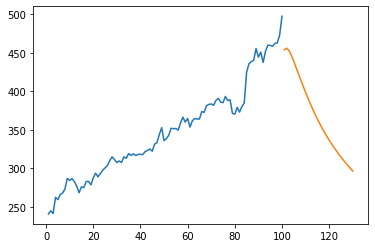

In [109]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(first_output))

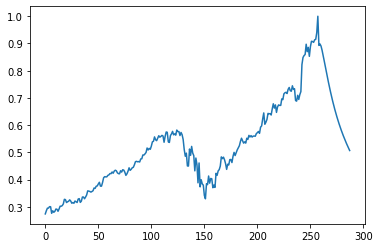

In [112]:
df3=df1.tolist()
df3.extend(first_output)
plt.plot(df3[1000:])

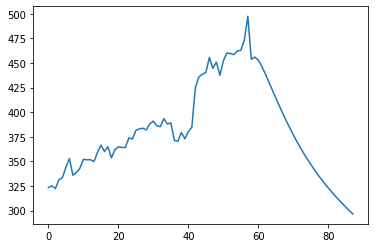

In [119]:
plt.plot(scaler.inverse_transform(df3[1200:]))